In [1]:
import os
import numpy as np
import mne
# import scipy.io as sio
%matplotlib inline

In [34]:
DATA_PATH = './data/bci_2a/eval'

*Notes:* 
- The BCI IV 2a has 9 different sets.
- The "E" and "T" in file names is represent for "Evaluation" and "Training"

In [4]:
sample_raw_file = os.path.join(DATA_PATH, 'train', 'A01T.gdf')
raw = mne.io.read_raw_gdf(sample_raw_file)

Extracting EDF parameters from c:\Users\manhd\Workplace\egg-motor-imagery\data\bci_2a\train\A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...


C:\Users\manhd\miniconda3\envs\egg\lib\site-packages\mne\io\edf\edf.py:1121: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
C:\Users\manhd\miniconda3\envs\egg\lib\contextlib.py:119: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


In [5]:
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: EEG-Fz, EEG-0, EEG-1, EEG-2, EEG-3, EEG-4, EEG-5, EEG-C3, EEG-6, ...
 chs: 25 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 100.0 Hz
 meas_date: 2005-01-17 12:00:00 UTC
 nchan: 25
 projs: []
 sfreq: 250.0 Hz
>

Effective window size : 8.192 (s)


C:\Users\manhd\AppData\Local\Temp/ipykernel_19012/1925098452.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=50)


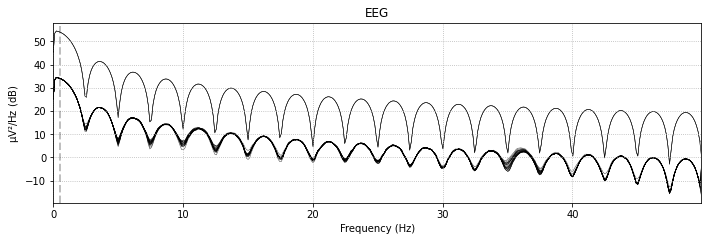

Using matplotlib as 2D backend.


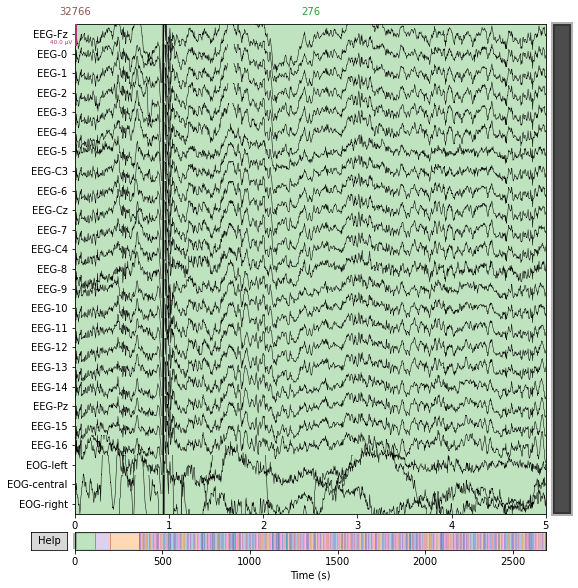

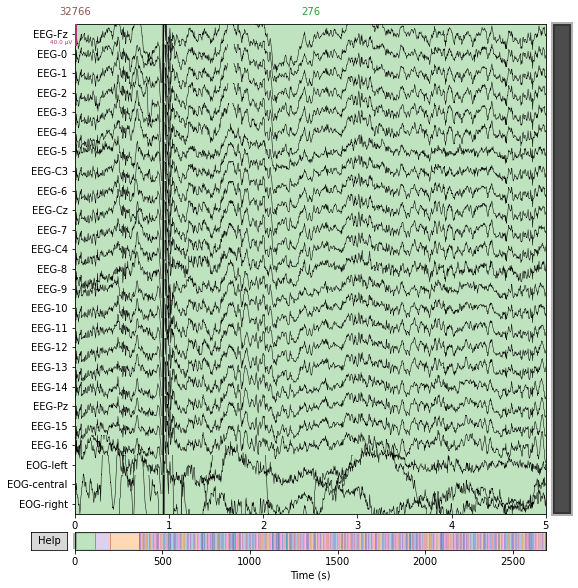

In [6]:
raw.plot_psd(fmax=50)
raw.plot(duration=5, n_channels=30)

In [6]:
events = mne.events_from_annotations(raw)
print(events[:5])  # show the first 5

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
(array([[     0,      0,      5],
       [     0,      0,      3],
       [ 29683,      0,      5],
       ...,
       [670550,      0,      6],
       [670550,      0,      1],
       [671050,      0,      7]]), {'1023': 1, '1072': 2, '276': 3, '277': 4, '32766': 5, '768': 6, '769': 7, '770': 8, '771': 9, '772': 10})


In [95]:
event_dict = {  'Eyes open': 4,         # 276
                'Eyes closed': 3,       # 277
                'Start': 6,             # 768
                'Left': 7,              # 769
                'Right': 8,             # 770
                'Foot': 9,              # 771
                'Tongue': 10,           # 772
                'Reject': 1,            # 1023
                'Eye': 2,               # 1072
                'New run': 5}           # 32766
                # 'Cue unknown': 783,

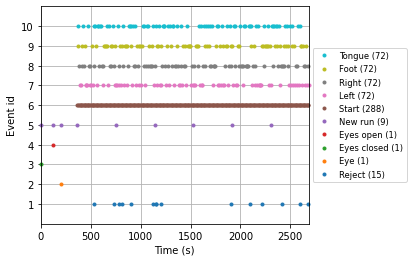

In [20]:
fig = mne.viz.plot_events(events[0], event_id=event_dict, sfreq=raw.info['sfreq'],
                          first_samp=raw.first_samp)

In [86]:
DATA_PATH = os.path.join('data', 'bci_2a', 'train')

In [ ]:
left_set = []
right_set = []
event_dict = {'Left': 7, 'Right': 8, }
file_list = [x for x in os.listdir(DATA_PATH) if 'gdf' in x]

for file in file_list:
    data = mne.io.read_raw_gdf(os.path.join(DATA_PATH, file))
    events = mne.events_from_annotations(data)
    
    epochs = mne.Epochs(data, events[0], event_id=event_dict, tmin=-0.1, tmax=0.4, 
                reject=dict(eeg=150e-6), preload=True, event_repeated='drop')

    left_set += [x for x in epochs['Left'].get_data()]
    
    right_set += [x for x in epochs['Right'].get_data()]
    # break

In [109]:
def save_dataset(name, set):
    save_path = os.path.join(DATA_PATH, name)
    if not os.path.exists(save_path):
        os.mkdir(save_path)
    for idx in range(len(set)):
        with open(os.path.join(save_path, f'{idx}.npy'), 'wb') as f:
            np.save(f, set[idx])

In [111]:
save_dataset('left', left_set)
save_dataset('right', right_set)

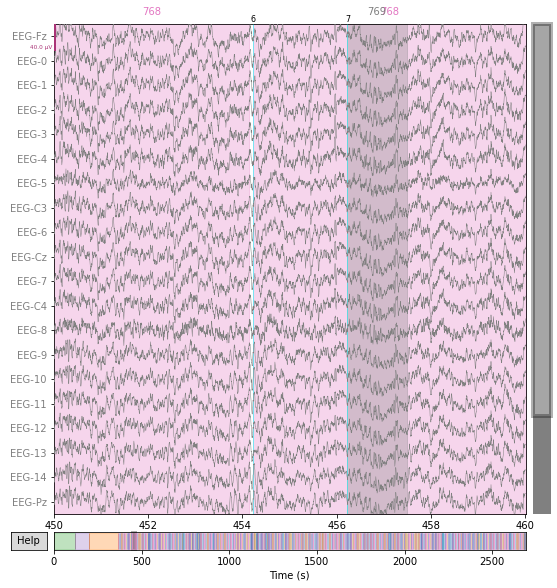

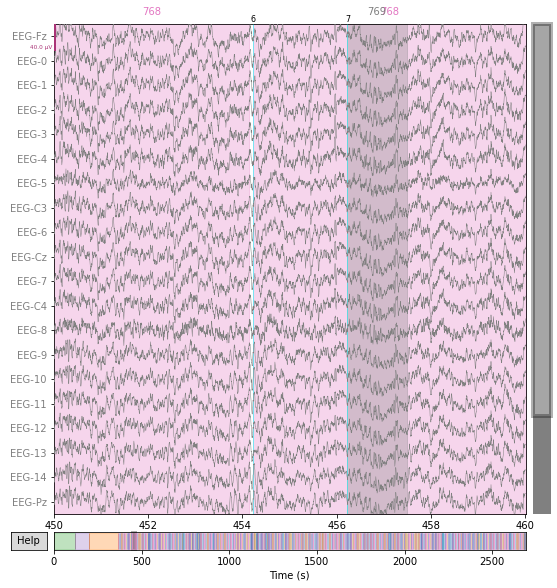

In [54]:
raw.plot(events=events[0], start=450, duration=10, color='gray',)

In [9]:
reject_criteria = dict(eeg=150e-6)       # 150 µV
                    #   eog=250e-6)       # 250 µV
                    #   mag=4000e-15,     # 4000 fT
                    #   grad=4000e-13,    # 4000 fT/cm

In [94]:
epochs = mne.Epochs(raw, events[0], event_id=event_dict, tmin=-0.1, tmax=0.4,
                    reject=reject_criteria, preload=True, event_repeated='drop')

Not setting metadata
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
585 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 585 events and 126 original time points ...
    Rejecting  epoch based on EEG : ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right']
    Rejecting  epoch based on EEG : ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right']
    Rejecting  epoch based on EEG : ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', '

In [95]:
train_set = []

In [132]:
epochs['Left'].get_data().shape

(69, 25, 126)

In [140]:
list = [x for x in epochs['Left'].get_data()]

In [142]:
len(list)

69

In [149]:
train_set += [x for x in epochs['Left'].get_data()]

In [150]:
len(train_set)

138

In [97]:
train_set[0].shape

(69, 25, 126)

In [101]:
import torch

In [114]:
input = torch.tensor(train_set[0][0])

In [115]:
input = input.unsqueeze(0).unsqueeze(0)

In [125]:
from model import EGGNet

In [128]:
model = EGGNet(n_channels=25)

TypeError: __init__() got an unexpected keyword argument 'n_channels'

In [120]:
input = input.permute(0,1,3,2)
input.shape

torch.Size([1, 1, 126, 25])

In [119]:
model.forward(input.permute(0,1,3,2).float())

RuntimeError: Calculated padded input size per channel: (126 x 25). Kernel size: (1 x 64). Kernel size can't be greater than actual input size

In [124]:
data_dir = './data/bci_2a/train'
eval_dir = './data/bci_2a/eval'

In [177]:
right_set = os.listdir(data_dir+'/right')

In [178]:
import random

split_list = []
while len(split_list) < int(len(right_set)*0.2):
    item = random.choice(right_set)
    if item not in split_list:
        split_list.append(item)

In [183]:
for file in split_list:
    os.rename(os.path.join(data_dir, 'right', file), os.path.join(eval_dir, 'right', file))

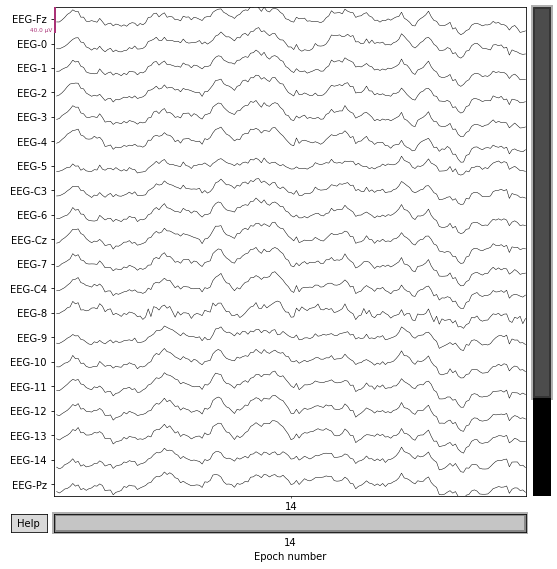

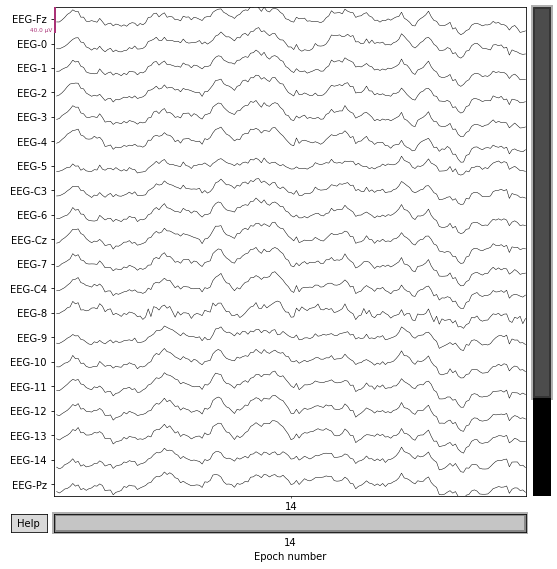

In [68]:
epochs['Left'][0].plot()

In [ ]:
epochs.plot()

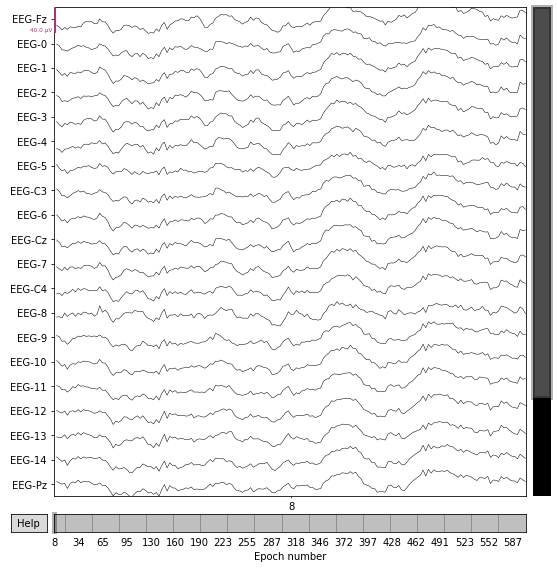

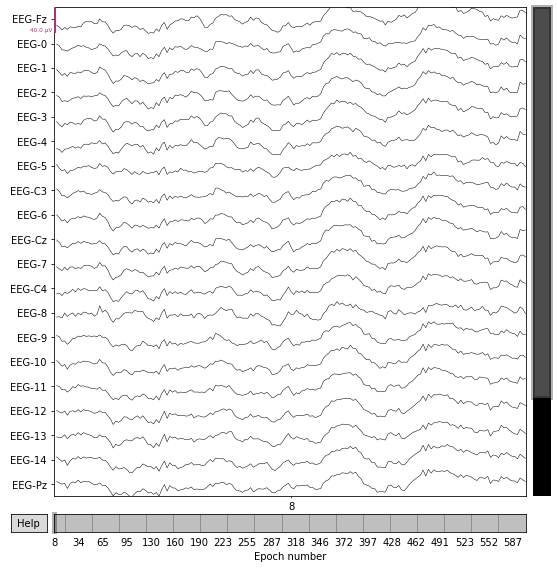

In [18]:
epochs.plot(n_epochs=1)

In [19]:
left_data = epochs['']

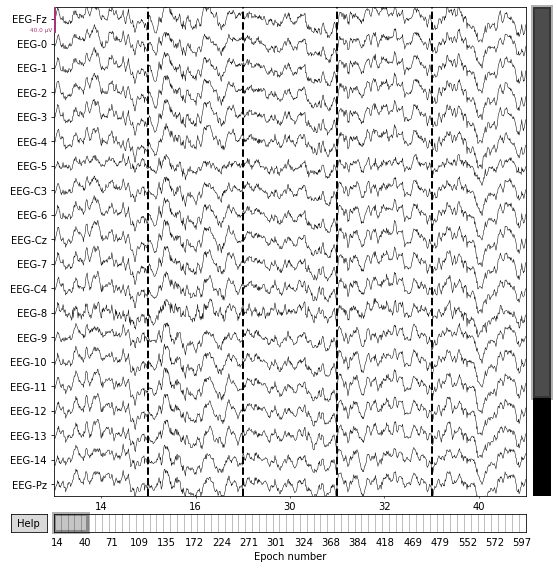

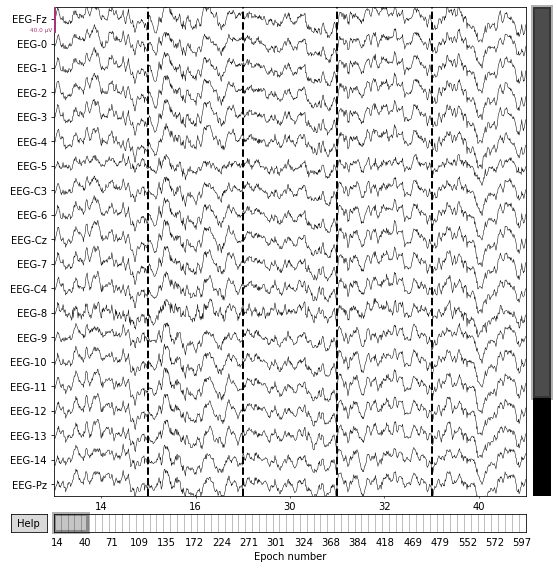

In [22]:
for 

In [60]:
print(epochs)

<Epochs |  489 events (all good), -0.2 - 0.5 sec, baseline -0.2 – 0 sec, ~16.4 MB, data loaded,
 'Cue onset foot': 69
 'Cue onset left': 69
 'Cue onset right': 71
 'Cue onset tongue': 69
 'Start of a new run': 0
 'Start of a trial': 211>
